# Introduction

I will starting with one-vs-rest model. The output layer (light red) can be split into two sublayer in the following way:

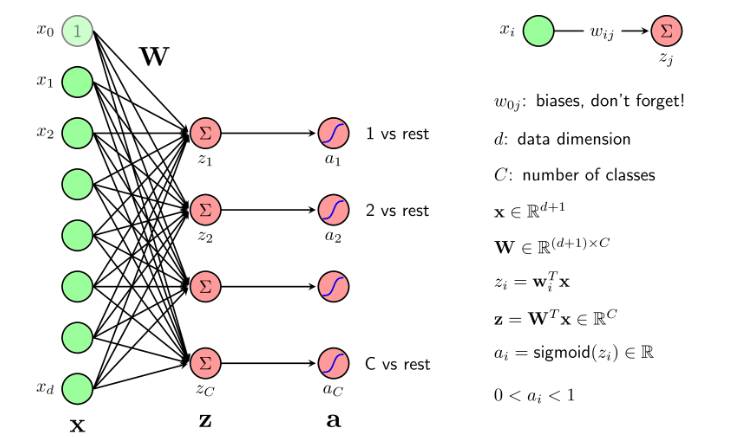

Given the data vector **x** with dimension $(d + 1)$, one element is added at the beginning to represent the bias in the linear combination. The free parameter $w_{0j}$ is also called the bias term.


Assume there are **C** classes. Using the one-vs-rest approach, we need to construct **C** different Logistic Regression classifiers. The predicted output is computed via the sigmoid function:

$$a_i = \text{sigmoid}(z_i) = \text{sigmoid}(\mathbf{w}_i^T \mathbf{x})$$

In this technique, the component $a_i$, where $i = 1, 2, \dots$, **C** is directly derived from $z_i$. Hence, there is no close connection between the different $a_i$ values, their sum could be greater or less than 1. If we can capture the relationship between the $z_i$ values, we could achieve better classification performance.

Note that in models such as Linear Regression, PLA, and Logistic Regression, there is only one node at the output layer. In those cases, the model's parameters consist of just one vector $\mathbf{w}$. However, in the case where the output layer has more than one node, the model’s parameters consist of a set of vectors $\mathbf{w}_i$, corresponding to each node. Therefore, we have a weight matrix $\mathbf{W}$ of the form:

$$\mathbf{W} = [\mathbf{w}_1, \mathbf{w}_2, \dots, \mathbf{w}_C]$$

# Softmax function

### Softmax formula

We need a probability model for each input **x** so that $a_i$ represents the probability that the input belongs to class **i**. The condition is that the values of $a_i$ must be positive and sum to 1. To meet these conditions, we consider all values $z_i$ and compute the values $a_i$ based on the relationships between these $z_i$ values. To ensure that $a_i$ are positive and their sum equals 1, we can impose a condition such that:

$$z_i = \mathbf{w}_i^T \mathbf{x}$$

The higher $z_i$, the higher the probability that the input belongs to class **i**. This condition requires a shared denominator, as shown below.

Note that $z_i$ can take both negative and positive values. A simple smoothing function ensures that $z_i$ becomes positive by using the exponential function, $\text{exp}(z_i) = e^{z_i}$. This smoothing condition is useful when calculating the derivative later. The final condition that ensures the sum of $a_i$ equals 1 is:

$$a_i = \frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)} \quad \forall i = 1, 2, \dots, C$$

This function computes all $a_i$ based on all $z_i$, ensuring all necessary conditions: positivity, summing to 1, and retaining the rank of each class. This function is called the softmax function. Note that $a_i$ can never be exactly 0 or 1, but it approaches 0 when $z_i$ is much smaller than other values $z_j$, where $j \neq i$.

Now, we assume that:

$$P(y_k = i | \mathbf{x}_k; \mathbf{W}) = a_i$$

In this case, $P(y = i | \mathbf{x}; \mathbf{W})$ represents the probability that a given input **x** belongs to class **i**, given the model parameters (weight matrix) **W**.

The figure below represents Softmax Regression in the form of a neural network:

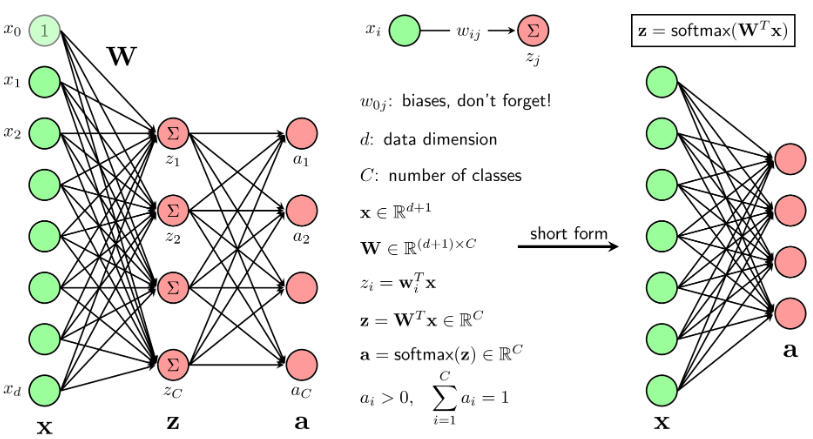

### Stable version of Softmax function

When one of the $z_i$ values is too large, calculating $\exp(z_i)$ may cause overflow, which can significantly affect the result of the softmax function. One way to address this issue is by using the following observation:

$$
\frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)} = \frac{\exp(-c) \exp(z_i)}{\exp(-c) \sum_{j=1}^C \exp(z_j)} = \frac{\exp(z_i - c)}{\sum_{j=1}^C \exp(z_j - c)}
$$

where $c$ is any constant.


# Loss function and Optimization

### One-hot coding

With the above network representation, each output will no longer be a value corresponding to each class but will be a vector with 1 element exactly equal to 1, the remaining elements equal 0. The numerator element is equal to 1 year in the position corresponding to that class, it can be seen that the data point being evaluated falls in this class with a probability of 1 (it is true, no need to predict). This way of encoding the output is exactly the one-hot encoding.

When using Softmax Regression model (sklearn), with each nput $\mathbf{x}$, we will have predict output is $a = \text{softmax}(\mathbf{W}^T \mathbf{x})$. Where $y$ is the true label represent in one-hot encoding. The loss function is defined as:

$$J(\mathbf{W}) = \sum_{i = 1}^n \|a_i - y_i\|_2^2$$

But this is not a good option. When evaluate the different (or distance) between two probability distributions, we have a better choice is the cross-entropy loss function.

### Cross Entropy

Cross Entropy between two probability distributions $p$ and $q$ is defined as:

$$H(p, q) = \mathbb{E}_p[-\log q] = -\sum_x p(x) \log q(x)$$

**Note that:** The cross-entropy function not symmetric, $H(p, q) \neq H(q, p)$. We can easily see that $p$ can take the value 0, but $q$ must be positive ($\log(0)$ is undefined). Therefore, when using cross entropy in supervised learning problems, **p** is often the real output because the real output only has 1 component equal to 1, the rest are 0 (one-hot), **q** is usually the first. make predictions, when there is no probability that is absolutely equal to 1 or absolutely equal to 0.

Also if you're an expert or have a good knowledge of the previous concepts, you will notice that Logistic Regression is a special case of Cross Entropy Loss when the number of classes is 2. **(I will show this in the next section)**

So to sum up, in case of we have **C** classes, the cross-entropy loss function is defined as:

$$J(\mathbf{W}; x_i, y_i) = -\sum_{j=1}^C y_{ij} \log a_{ij}$$

With $y_{ji}$ and $a_{ji}$ are the $j^{th}$ element of the true label and the predicted output respectively. Output depends on the input $\mathbf{x}_i$ and the model parameters $\mathbf{W}$.

### Loss function for Softmax Regression

Connect the above concepts, the loss function for Softmax Regression is defined as:

$$J(\mathbf{W}) = -\sum_{i=1}^n \sum_{j=1}^C y_{ij} \log a_{ij} = -\sum_{i=1}^n \sum_{j=1}^C y_{ij} \log{(\frac{\exp(z_{ij})}{\sum_{k=1}^C \exp(z_{ik})})}$$

### Optimization

I will use SGD (Stochastic Gradient Descent) to optimize the loss function. (If you don't know check my previous folder)

With only one pair of input and output $(\mathbf{x}_i, y_i)$, we have:

$$J_i(\mathbf{W}) = -\sum_{j=1}^C y_{ij} \log a_{ij} \\ 
= -\sum_{j = 1}^C (y_{ij} \mathbf{w}_j^T \mathbf{x}_i - y_{ij} \log(\sum_{k = 1}^C \exp(\mathbf{w}_k^T \mathbf{x}_i))) \\= - \sum_{j = 1}^C y_{ij} \mathbf{w}_j^T \mathbf{x}_i + \log(\sum_{k = 1}^C \exp(\mathbf{w}_k^T \mathbf{x}_i)) \\ \\ (1)$$

In the last line, I'm using $\sum_{j = 1}^C y_{ij} = 1$ because it's one-hot encoding.

Next we used:

$$\frac{\nabla_{\mathbf{w}_j} J_i(\mathbf{W})}{\partial \mathbf{w}_j} = [\frac{\nabla_{\mathbf{w}_1} J_i(\mathbf{W})}{\partial \mathbf{w}_1}, \frac{\nabla_{\mathbf{w}_2} J_i(\mathbf{W})}{\partial \mathbf{w}_2}, \dots, \frac{\nabla_{\mathbf{w}_C} J_i(\mathbf{W})}{\partial \mathbf{w}_C}] \\ (2)$$

After derivation, we gradient by each column of $\mathbf{W}$ connect with previous equation (1), we have:

$$\frac{\nabla_{\mathbf{w}_j} J_i(\mathbf{W})}{\partial \mathbf{w}_j} = -\mathbf{x}_i y_{ij} + \frac{\exp(\mathbf{w}_j^T \mathbf{x}_i)}{\sum_{k = 1}^C \exp(\mathbf{w}_k^T \mathbf{x}_i)} \mathbf{x}_i$$

Finally, we update the weight matrix $\mathbf{W}$ by:

$$ = - y_{ij} \mathbf{x}_i + a_{ij} \mathbf{x}_i \\= \mathbf{x}_i (a_{ij} - y_{ij}) = \mathbf{e}_{ij} \mathbf{x}_i \\ (3)$$

Where $\mathbf{e}_{ij} = a_{ij} - y_{ij}$ is the error vector.

Connect (2) and (3), we have the update rule for the weight matrix $\mathbf{W}$:

$$\mathbf{W} = \mathbf{W} - \eta \mathbf{e}_{ij} \mathbf{x}_i$$

Where $\eta$ is the learning rate.

### Logistic Function is a special case of Softmax

When $C = 2$, the Softmax function is reduced to the Logistic function. In this case, the output is:

$$a_1 = \frac{\exp(\mathbf{w_1}^T \mathbf{x})}{\exp(\mathbf{w_1}^T \mathbf{x}) + \exp(\mathbf{w_2}^T \mathbf{x})} = \frac{1}{1 + \exp(\mathbf{w_2}^T \mathbf{x} - \mathbf{w_1}^T \mathbf{x})} = \frac{1}{1 + \exp((\mathbf{w_2} - \mathbf{w_1})^T \mathbf{x})} = \frac{1}{1 + \exp(\mathbf{w}^T \mathbf{x})}$$

Where $\mathbf{w} = \mathbf{w_2} - \mathbf{w_1}$.

This is Sigmoid function, which is used in Logistic Regression.

Softmax Regression have another name is Multinomial Logistic Regression, Maximum Entropy Classifier, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create a logistic regression model (multinomial)
model = linear_model.LogisticRegression(C = 1e5, solver = 'lbfgs', multi_class = 'multinomial')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9333333333333333


c:\Users\nguye\anaconda3\envs\ai\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Implementation

### Boundary created by Softmax Regression is linear

Based on softmax, one point $x$ is classified into class $i$ if $a_i \geq a_k$, $\forall k \neq i$. This is equivalent to:

$$\mathbf{w}_i^T \mathbf{x} \geq \mathbf{w}_k^T \mathbf{x} \Leftrightarrow (\mathbf{w}_i - \mathbf{w}_k)^T \mathbf{x} \geq 0$$

This is a linear boundary. Therefore, the decision boundary created by Softmax Regression is linear.

### Softmax Regression is one of the most popular models

Softmax and SVM is two of the most popular models in classification. Softmax is more popular in the field of deep learning, while SVM is more popular in the field of machine learning. The reason is that Softmax is a probabilistic model, while SVM is a geometric model. Softmax is more suitable for multi-class classification, while SVM is more suitable for binary classification. Softmax is more suitable for deep learning, while SVM is more suitable for machine learning.